### Purpose
The aim of this work is to answer the question: “Is the income of a person independent from such factors as the marital status and workclass?”.

#### Data
In this case I was interested in 3 columns from the train dataset: workclass, final weight(income) and marital-status.
The columns however were split in multiple categories, and the income column contained individual income sizes, being not suitable for most of the further operations.
For future analysis I reclassified the column categories.

Marital-status column contained the following labels: Married-civ-spouse, Never-married, Divorced, Widowed, Separated, Married-spouse-absent, Married-AF-spouse, which I grouped into: Married, Never-married, Widowed, Divorced.

Workclass column was split into: Self-emp-not-inc, Private, Self-emp-inc, Federal-gov, State-gov, Local-gov. For convenience I collapsed these categories into three broader groups: Self-employed, Private, Government.

Finally, I cut the income group into the following parts: "<= 50K", "50K < x <= 150K", "150K < x <= 250K", "> 250K".

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


income_train=pd.read_csv(r"C:\Users\Lenovo\Downloads\archive\train.csv")

print(income_train.head(5))
print(income_train.shape)

income_train=income_train.iloc[:, [1, 2, 5]]
print(income_train)

workclass= income_train.workclass.unique()
print(workclass)
marital_status=income_train["marital-status"].unique()
print(marital_status)

mapping1 = {
    'Married-civ-spouse':"Married",
    'Never-married':"Never-married",
    'Divorced': "Divorced",
    'Widowed':"Widowed",
    'Separated':"Divorced",
    'Married-spouse-absent':"Married",
    'Married-AF-spouse': "Married"
}

income_train["marital_group"] = income_train["marital-status"].map(mapping1)

mapping2 ={
    'Self-emp-not-inc': "Self-employed",
    'Private': "Private",
    'Self-emp-inc': "Self-employed",
    'Federal-gov': "Government",
    'State-gov':"Government",
    'Local-gov':"Government"
}

income_train["workclass_group"]=income_train.workclass.map(mapping2)

income_train["income_group"]=pd.cut(income_train.fnlwgt,
                              bins=[0, 50000, 150000, 250000, income_train.fnlwgt.max()],
                              labels = ["<= 50K", "50K < x <= 150K", "150K < x <= 250K", "> 250K"])

income_train = income_train.loc[:, ["income_group", "marital_group", "workclass_group"]]
print(income_train)

   age  workclass  fnlwgt     education  educational-num      marital-status  \
0   67    Private  366425     Doctorate               16            Divorced   
1   17    Private  244602          12th                8       Never-married   
2   31    Private  174201     Bachelors               13  Married-civ-spouse   
3   58  State-gov  110199       7th-8th                4  Married-civ-spouse   
4   25  State-gov  149248  Some-college               10       Never-married   

         occupation   relationship   race gender  capital-gain  capital-loss  \
0   Exec-managerial  Not-in-family  White   Male         99999             0   
1     Other-service      Own-child  White   Male             0             0   
2   Exec-managerial        Husband  White   Male             0             0   
3  Transport-moving        Husband  White   Male             0             0   
4     Other-service  Not-in-family  Black   Male             0             0   

   hours-per-week native-country  inco

#### Data Illustration

In order to visualize the data I constructed contingency tables with total percentages. 
From the contingency table we can see the distribution of income across different categories of people.


In [9]:
from IPython.display import display, Markdown

contingency_table1 = pd.crosstab(income_train["income_group"], income_train["marital_group"], normalize=True)
display(Markdown("### Table 1: Income x Marital Status"))
display(contingency_table1)
contingency_table2 = pd.crosstab(income_train["income_group"], income_train["workclass_group"], normalize=True)
display(Markdown("### Table 2: Income x Workclass"))
display(contingency_table2)
contingency_table3 = pd.crosstab([income_train["income_group"], income_train["marital_group"]], income_train["workclass_group"], normalize=True)
display(Markdown("### Table 3: Income x Marital Status x Workclass"))
display(contingency_table3)


### Table 1: Income x Marital Status

marital_group,Divorced,Married,Never-married,Widowed
income_group,,,,
<= 50K,0.012034,0.033146,0.022340,0.002320
50K < x <= 150K,0.050413,0.145756,0.092841,0.010783
150K < x <= 250K,0.068408,0.193621,0.135018,0.012762
> 250K,0.035944,0.099484,0.079965,0.005164


### Table 2: Income x Workclass

workclass_group,Government,Private,Self-employed
income_group,,,
<= 50K,0.012937,0.044170,0.011537
50K < x <= 150K,0.042046,0.218870,0.039222
150K < x <= 250K,0.054862,0.308634,0.046849
> 250K,0.031643,0.166590,0.022640


### Table 3: Income x Marital Status x Workclass

workclass_group                 Government   Private  Self-employed
income_group     marital_group                                     
<= 50K           Divorced         0.002534  0.008351       0.001279
                 Married          0.006324  0.018923       0.008134
                 Never-married    0.003524  0.015930       0.001665
                 Widowed          0.000555  0.000965       0.000459
50K < x <= 150K  Divorced         0.008327  0.037822       0.004924
                 Married          0.020878  0.099129       0.027902
                 Never-married    0.011223  0.075234       0.005141
                 Widowed          0.001617  0.006686       0.001255
150K < x <= 250K Divorced         0.010524  0.052956       0.005744
                 Married          0.027371  0.137264       0.032439
                 Never-married    0.014772  0.109990       0.007410
                 Widowed          0.002196  0.008424       0.001255
> 250K           Divorced         0.006179  0.027323       0.002993
                 Married          0.015399  0.070189       0.015665
                 Never-married    0.009172  0.065724       0.003524
                 Widowed          0.000893  0.003355       0.000459

I also constructed a stacked bar chart in order to make data comprehension more intuitive.

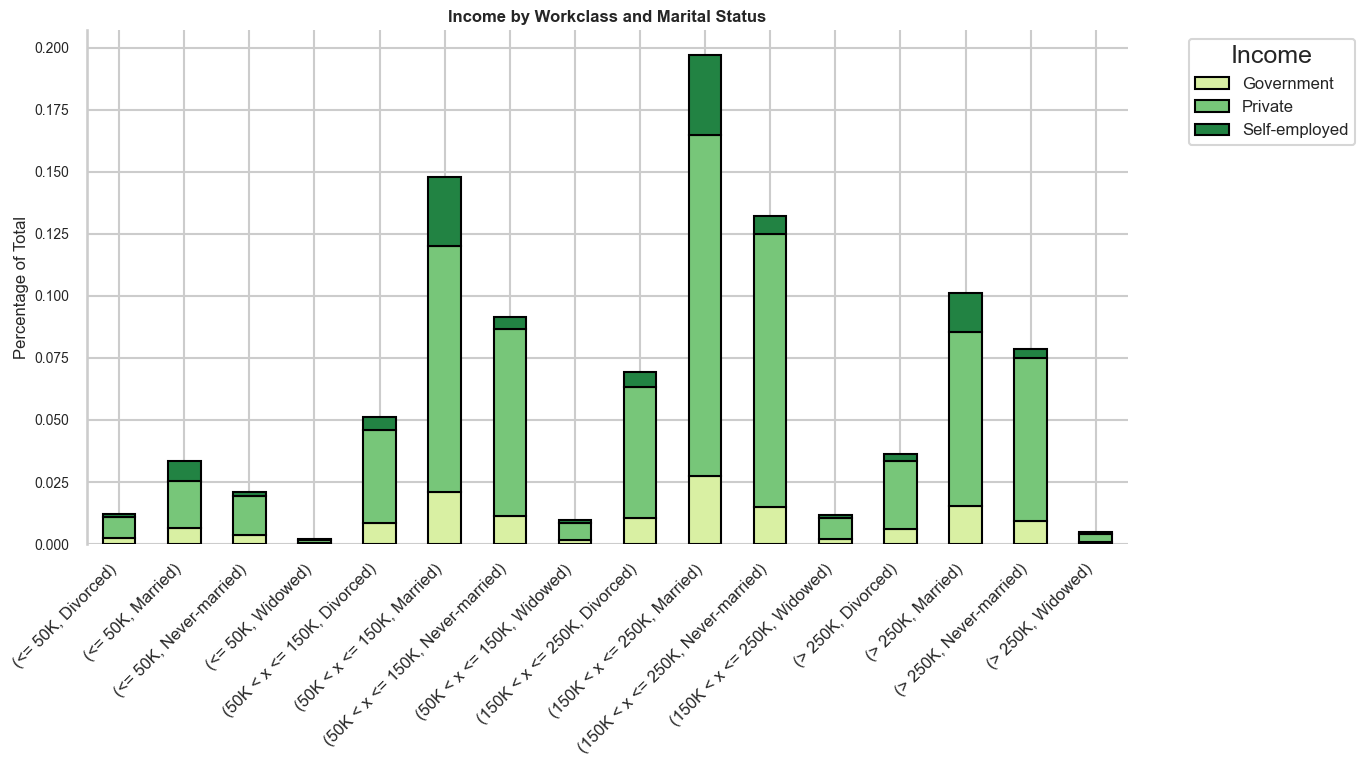

In [12]:
from statsmodels.graphics.mosaicplot import mosaic
sns.set_style("whitegrid")
sns.set_context("talk")

colors = sns.color_palette("YlGn", 3)

ax=contingency_table3.plot(
    kind="bar",
    stacked=True,
    figsize=(14,8),
    color=colors,
    edgecolor="black",
)

ax.set_ylabel("Percentage of Total", fontsize=12)
plt.xlabel("")
ax.set_title("Income by Workclass and Marital Status", fontsize=12, fontweight="bold")
ax.legend(title="Income", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=12)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(fontsize=10)
sns.despine(left=False, bottom=True)

plt.tight_layout()
plt.savefig("Stacked Bar Chart", dpi=300, bbox_inches='tight')
plt.show()


#### χ2 test

In order to verify if the variables are stochastically independent I conducted a Pearson’s Chi-squared tests.  
In the first one, was tested the hypothesis that income is independent of marital status and workclass against the alternative.

H0: Income and  (workclass x marital status) are stochastically independent. 

HA: Income and (workclass x marital status) are not stochastically independent (they are paired).


With p-value being 1 (significance level=0,05), we fail to reject H0.

In [16]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(contingency_table3)

print("Chi-squared", chi2)
print("p-value", p)
print("Degrees of freedom", dof)

Chi-squared 0.03793796695646966
p-value 1.0
Degrees of freedom 30


However, I wanted to check if income can depend on one of the 2 factors.
So, in the second one, was tested the hypothesis that income is independent of workclass against the alternative.

H0: Income and workclass are stochastically independent.

HA: Income and workclass are not stochastically independent (they are paired).

In [14]:
chi2, p, dof, expected = chi2_contingency(pd.crosstab(income_train['income_group'], income_train['workclass_group']))

print("Chi-squared", chi2)
print("p-value", p)
print("Degrees of freedom", dof)

Chi-squared 190.15483666575497
p-value 2.358639480499773e-38
Degrees of freedom 6


H0: Income and marital status are stochastically independent. 

HA: Income and marital status are not stochastically independent (they are paired).

In [15]:
chi2, p, dof, expected = chi2_contingency(pd.crosstab(income_train['income_group'], income_train['marital_group']))

print("Chi-squared", chi2)
print("p-value", p)
print("Degrees of freedom", dof)

Chi-squared 93.77537186466074
p-value 2.8374040162274967e-16
Degrees of freedom 9


It can be concluded that income is related to marital status and to workclass individually.
But once both factors are considered together, the combined pattern doesn’t show a significant association.

#### Logistic regression


However, I was interested in the predictive strength of these variables. 
I decided to apply the logistic model, as the dependent variable as well as the explanatory variables were nominal.
The dataset was split into training data and test data. The test data was transformed the same way the training data before.
After getting the predictions using the logistic model, and comparing them with the actuall data, it can be concluded that Using only marital status and workclass, the model correctly classified approximately 40% of income outcomes in the test data.

In [21]:
income_test= pd.read_csv(r"C:\Users\Lenovo\Downloads\archive\test.csv")
income_test=income_test.iloc[:, [1, 2, 5]]

mapping1 = {
    'Married-civ-spouse':"Married",
    'Never-married':"Never-married",
    'Divorced': "Divorced",
    'Widowed':"Widowed",
    'Separated':"Divorced",
    'Married-spouse-absent':"Married",
    'Married-AF-spouse': "Married"
}

income_test["marital_group"] = income_test["marital-status"].map(mapping1)

mapping2 ={
    'Self-emp-not-inc': "Self-employed",
    'Private': "Private",
    'Self-emp-inc': "Self-employed",
    'Federal-gov': "Government",
    'State-gov':"Government",
    'Local-gov':"Government"
}

income_test["workclass_group"]=income_test.workclass.map(mapping2)

income_test["income_group"]=pd.cut(income_test.fnlwgt,
                              bins=[0, 50000, 150000, 250000, income_test.fnlwgt.max()],
                              labels = ["<= 50K", "50K < x <= 150K", "150K < x <= 250K", "> 250K"])

income_test = income_test.loc[:, ["income_group", "marital_group", "workclass_group"]]


income_tr_encoded = pd.get_dummies(income_train, columns=['marital_group', 'workclass_group'], drop_first=True)
income_ts_encoded = pd.get_dummies(income_test, columns=['marital_group', 'workclass_group'], drop_first=True)


from sklearn.linear_model import LogisticRegression

X_train = income_tr_encoded.drop('income_group', axis=1)
Y_train = income_tr_encoded['income_group']

model = LogisticRegression()
model.fit(X_train, Y_train)

X_test = income_ts_encoded.drop("income_group", axis=1)
Y_test = income_ts_encoded["income_group"]

y_pred = model.predict(X_test)

comparison = income_test.copy()
comparison["true_income"] = Y_test.values
comparison["predicted_income"] = y_pred

print(comparison[["true_income", "predicted_income"]].head())

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

        true_income  predicted_income
0            > 250K  150K < x <= 250K
1   50K < x <= 150K  150K < x <= 250K
2  150K < x <= 250K  150K < x <= 250K
3            > 250K  150K < x <= 250K
4            > 250K  150K < x <= 250K
Accuracy: 0.4082313681868743
